In [1]:
import torch
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data.dataset import Dataset

import matplotlib.pyplot as plt
from PIL import Image

import os
import numpy as np

In [2]:
import lib.data

In [13]:
print(torch.__version__)

0.4.0


### Create the DataSet and DataLoader

In [3]:
PATH="/home/as/datasets/lily/deep-fashion"

In [4]:
df = lib.data.DeepFashion(PATH)

Reading data structures from:  fashion.db
Training images 209222
Validation images 40000
Test images 40000


In [5]:
class DeepFashionDataset(Dataset):

    def __init__(self, dataset, dataset_path, transformer=None):

        super().__init__()

        self.dataset = dataset
        self.dataset_path = dataset_path
        self.transformer = transformer
        self.to_tensor = transforms.ToTensor()

    def __getitem__(self, index):
        """ Returns ImageTensor, OHE Category, Attributes vector
        """

        item = self.dataset[index]
        img_path, category, attributes = item

        image = plt.imread(os.path.join(self.dataset_path, img_path))
        
        if self.transformer is not None:
            image = self.transformer(image)
        else:
            image = self.to_tensor(image)
            
        return image, category.astype(np.uint8), attributes

    def __len__(self):
        return len(self.dataset)

In [6]:
# Hello test

transform=transforms.Compose([transforms.ToPILImage(), transforms.Resize(size=(400, 400)),transforms.ToTensor()])
ds_train = DeepFashionDataset(df.train_imgs, PATH, transformer=transform)

val = next(iter(ds_train))

print("The Image")
print(type(val[0]))
print(val[0].shape)

print("The Category")
print(type(val[1]))
print(val[1].shape)


print("The Attributes")
print(type(val[2]))
print(val[2].shape)

The Image
<class 'torch.Tensor'>
torch.Size([3, 400, 400])
The Category
<class 'numpy.ndarray'>
(50,)
The Attributes
<class 'numpy.ndarray'>
(1000,)


In [7]:
transform=transforms.Compose([transforms.ToPILImage(), transforms.Resize(size=(300, 300)),transforms.ToTensor()])

In [8]:
ds_train = DeepFashionDataset(df.train_imgs, PATH, transformer=transform)
ds_test  = DeepFashionDataset(df.test_imgs, PATH, transformer=transform)
ds_val   = DeepFashionDataset(df.val_imgs, PATH, transformer=transform)

In [9]:
img = ds_train[5002][0].numpy().swapaxes(0, 1).swapaxes(1, 2)

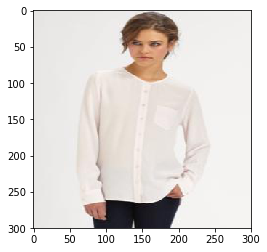

In [10]:
plt.imshow(img)

In [11]:
dl_train = data.DataLoader(ds_train, batch_size=12, shuffle=True, num_workers=4)
dl_test = data.DataLoader(ds_test, batch_size=12, shuffle=True, num_workers=4)
dl_val = data.DataLoader(ds_val, batch_size=12, shuffle=True, num_workers=4)

In [12]:
# Hello test

for img, cat, attr in dl_val:
    print(type(img))
    print(len(img))
    break

<class 'torch.Tensor'>
12


### Create the Model

In [16]:
resnet = models.resnet34(pretrained=True)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [24]:
list(resnet.children())[-1]

Linear(in_features=512, out_features=1000, bias=True)